In [2]:
from pkg_req import *
from construction import *
from solver import *
from backend import *
from pulses import *
from fidelity import *
from initialization import *
from qiskit.visualization import plot_bloch_multivector

# **Construction of Ry rotation pulse sequence**

- 2 ways of doing this: Drag pulse and a Gaussian Pulse with longer time durations and larger sigma values than previously used

**Drag Approach**

Here we look at different choices of amplitudes while keeping the duration, sigma, and beta values large:

In [4]:
probs=[]
for amp in np.arange(0,1.1,0.1):
    with pulse.build(backend=backend, name='Single Drag w/ Params from StateFlip') as sxp:
        with pulse.align_sequential():
            pulse.play(pulse.Drag(4396, amp, 1000,3.5), pulse.DriveChannel(0))
            #pulse.shift_phase(0, pulse.DriveChannel(0))
            pulse.acquire(duration=1000, qubit_or_channel=0, register=pulse.MemorySlot(0))
    #sxp.draw()
    job = backend.run(sxp, shots=1000)
    result = job.result()
    counts=result.get_counts()
    #print(counts)
    required_keys = ['0', '1']
    for key in required_keys:
        counts.setdefault(key, 0)
    counts = {'0': int(counts['0']), '1': int(counts['1'])} 
    total_shots = sum(counts.values())
    probabilities = {state: np.sqrt(count/total_shots) for state, count in counts.items()}
    amp_prob=[probabilities['0'],probabilities['1']]
    probs.append(amp_prob)

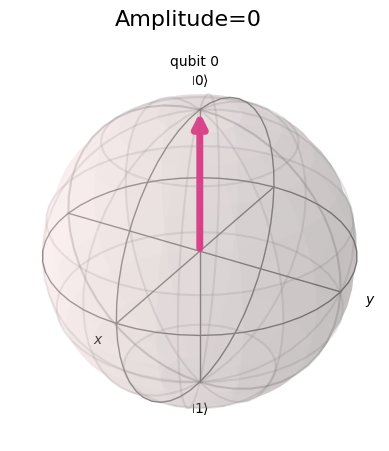

In [11]:
plot_bloch_multivector(probs[0], title='Amplitude=0')

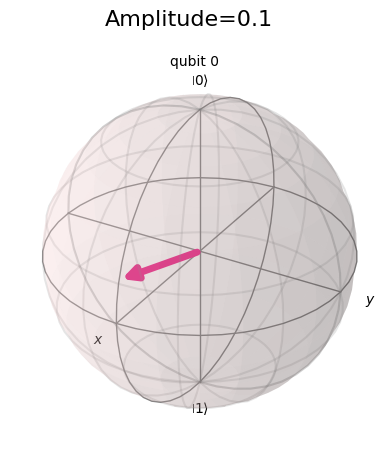

In [14]:
plot_bloch_multivector(probs[1], title='Amplitude=0.1')

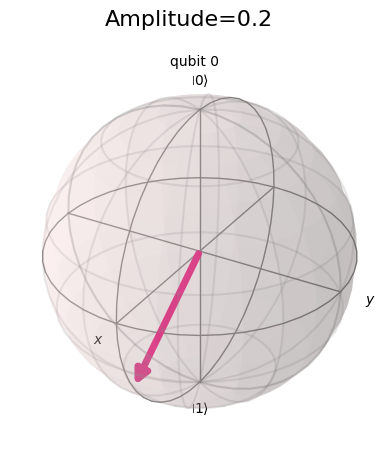

In [12]:
plot_bloch_multivector(probs[2], title='Amplitude=0.2')

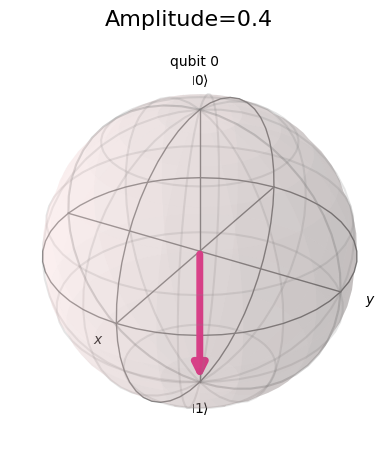

In [13]:
plot_bloch_multivector(probs[5], title='Amplitude=0.4')

**Gaussian Approach**

Here we take the same duration (4396) and sigma (1000) and again iterate through the amplitude to illustrate the rotation

In [16]:
probs=[]
for amp in np.arange(0,1.1,0.1):
    with pulse.build(backend=backend, name='Single Drag w/ Params from StateFlip') as sxp:
        with pulse.align_sequential():
            pulse.play(pulse.library.Gaussian(4386, amp, 1000), pulse.DriveChannel(0))
            #pulse.shift_phase(0, pulse.DriveChannel(0))
            pulse.acquire(duration=1000, qubit_or_channel=0, register=pulse.MemorySlot(0))
    #sxp.draw()
    job = backend.run(sxp, shots=1000)
    result = job.result()
    counts=result.get_counts()
    #print(counts)
    required_keys = ['0', '1']
    for key in required_keys:
        counts.setdefault(key, 0)
    counts = {'0': int(counts['0']), '1': int(counts['1'])} 
    total_shots = sum(counts.values())
    probabilities = {state: np.sqrt(count/total_shots) for state, count in counts.items()}
    amp_prob=[probabilities['0'],probabilities['1']]
    probs.append(amp_prob)

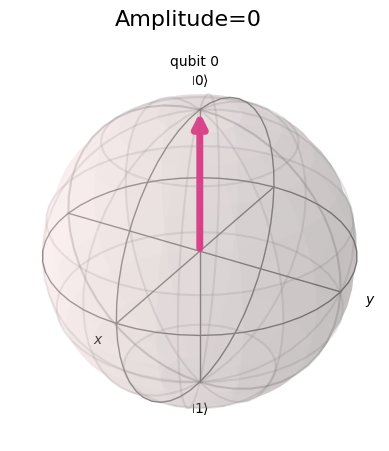

In [17]:
plot_bloch_multivector(probs[0], title='Amplitude=0')

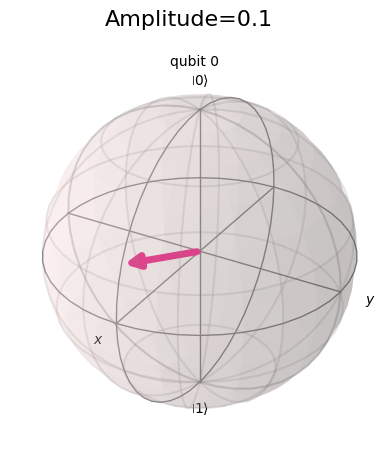

In [18]:
plot_bloch_multivector(probs[1], title='Amplitude=0.1')

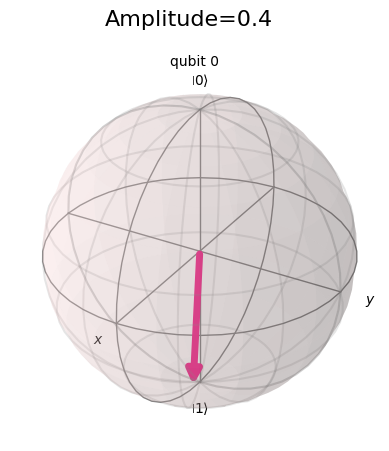

In [19]:
plot_bloch_multivector(probs[5], title='Amplitude=0.4')

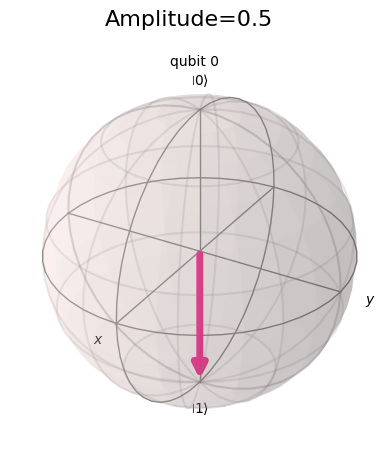

In [20]:
plot_bloch_multivector(probs[6], title='Amplitude=0.5')

# **Rz-type rotation**

# Below we show a single $R_y$ rotation (as shown above) with an arbitrarily small amplitude that is far from $|0>$ and $|1>$ 

In [153]:
probs=[]
amp=0.1
with pulse.build(backend=backend, name='Single Drag w/ Params from StateFlip') as sxp:
    with pulse.align_sequential():
        pulse.play(pulse.Drag(4396, amp, 1000,3.5), pulse.DriveChannel(0))
        #pulse.shift_phase(0, pulse.DriveChannel(0))
        pulse.acquire(duration=1000, qubit_or_channel=0, register=pulse.MemorySlot(0))
#sxp.draw()
job = backend.run(sxp, shots=1000)
result = job.result()
counts=result.get_counts()
#print(counts)
required_keys = ['0', '1']
for key in required_keys:
    counts.setdefault(key, 0)
counts = {'0': int(counts['0']), '1': int(counts['1'])} 
total_shots = sum(counts.values())
probabilities = {state: np.sqrt(count/total_shots) for state, count in counts.items()}
amp_prob=[probabilities['0'],probabilities['1']]
amp_prob

[np.float64(0.8203657720797474), np.float64(0.5718391382198319)]

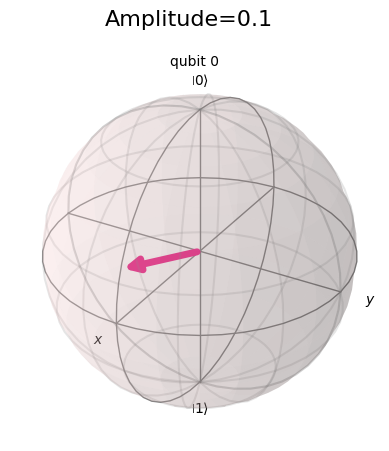

In [154]:
plot_bloch_multivector(amp_prob, title='Amplitude=0.1')

# We now perform an $R_yR_y$ operation:

In [155]:
probs=[]
amp=0.1
with pulse.build(backend=backend, name='Single Drag w/ Params from StateFlip') as sxp:
    with pulse.align_sequential():
        pulse.play(pulse.Drag(4396, amp, 1000,3.5), pulse.DriveChannel(0))
        pulse.play(pulse.Drag(4396, amp, 1000,3.5), pulse.DriveChannel(0))#pulse.shift_phase(0, pulse.DriveChannel(0))
        pulse.acquire(duration=1000, qubit_or_channel=0, register=pulse.MemorySlot(0))
#sxp.draw()
job = backend.run(sxp, shots=1000)
result = job.result()
counts=result.get_counts()
#print(counts)
required_keys = ['0', '1']
for key in required_keys:
    counts.setdefault(key, 0)
counts = {'0': int(counts['0']), '1': int(counts['1'])} 
total_shots = sum(counts.values())
probabilities = {state: np.sqrt(count/total_shots) for state, count in counts.items()}
amp_prob=[probabilities['0'],probabilities['1']]
amp_prob

[np.float64(0.3847076812334269), np.float64(0.9230384607371461)]

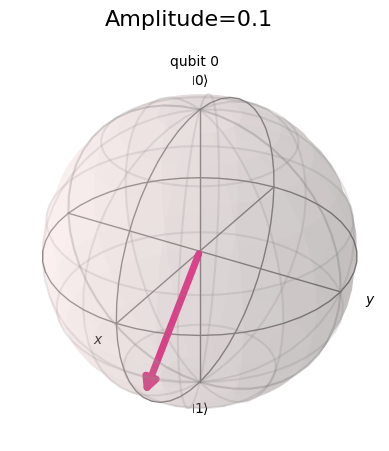

In [156]:
plot_bloch_multivector(amp_prob, title='Amplitude=0.1')

# And lastly, we perform a $R_yV_zR_y$ rotation:

In [157]:
probs=[]
amp=0.1
with pulse.build(backend=backend, name='Single Drag w/ Params from StateFlip') as sxp:
    with pulse.align_sequential():
        pulse.play(pulse.Drag(4396, amp, 1000,3.5), pulse.DriveChannel(0))
        pulse.shift_phase(np.pi/2, pulse.DriveChannel(0))
        pulse.play(pulse.Drag(4396, amp, 1000,3.5), pulse.DriveChannel(0))
        pulse.acquire(duration=1000, qubit_or_channel=0, register=pulse.MemorySlot(0))
#sxp.draw()
job = backend.run(sxp, shots=1000)
result = job.result()
counts=result.get_counts()
#print(counts)
required_keys = ['0', '1']
for key in required_keys:
    counts.setdefault(key, 0)
counts = {'0': int(counts['0']), '1': int(counts['1'])} 
total_shots = sum(counts.values())
probabilities = {state: np.sqrt(count/total_shots) for state, count in counts.items()}
amp_prob=[probabilities['0'],probabilities['1']]
amp_prob

[np.float64(0.8276472678623424), np.float64(0.5612486080160912)]

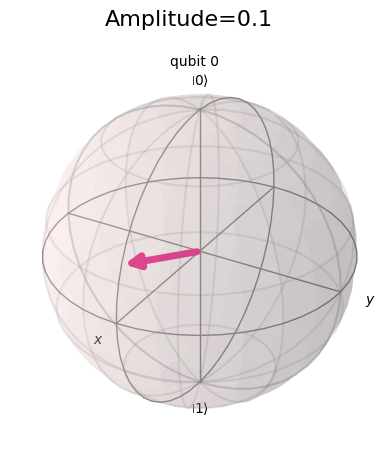

In [158]:
plot_bloch_multivector(amp_prob, title='Amplitude=0.1')

# Here, we can see that $R_yR_y\neq R_yV_zR_y=R_y$. The $V_z$ operator is working correctly and as assumed, but the multivector bloch plotting function does not include phase information, so we are unable to see any $V_z$-type rotations in the outputted figures